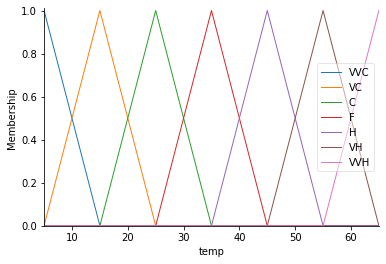

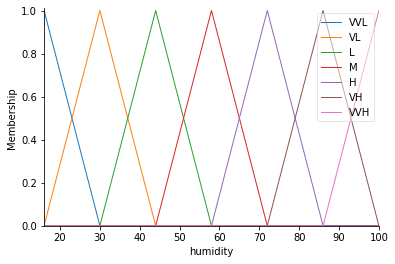

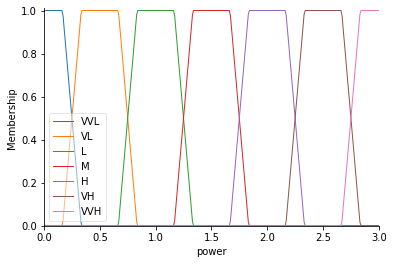

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#genération des variables

#input
## température => 
temp = ctrl.Antecedent(np.arange(5,66,1),'temp')
humidity = ctrl.Antecedent(np.arange(16,101,1),'humidity')
power = ctrl.Consequent(np.arange(0,3.01,0.01),'power')

#temp.automf(7)?

temp['VVC']=fuzz.trimf(temp.universe,[5, 5, 15])
temp['VC']=fuzz.trimf(temp.universe,[5,15,25])
temp['C']=fuzz.trimf(temp.universe,[15,25,35])
temp['F']=fuzz.trimf(temp.universe,[25,35,45])
temp['H']=fuzz.trimf(temp.universe,[35,45,55])
temp['VH']=fuzz.trimf(temp.universe,[45,55,65])
temp['VVH']=fuzz.trimf(temp.universe,[55,65,65])

temp.view()

##humidité =>
humidity['VVL']=fuzz.trimf(humidity.universe,[16, 16, 30])
humidity['VL']=fuzz.trimf(humidity.universe,[16,30,44])
humidity['L']=fuzz.trimf(humidity.universe,[30,44,58])
humidity['M']=fuzz.trimf(humidity.universe,[44,58,72])
humidity['H']=fuzz.trimf(humidity.universe,[58,72,86])
humidity['VH']=fuzz.trimf(humidity.universe,[72,86,100])
humidity['VVH']=fuzz.trimf(humidity.universe,[86,100,100])

humidity.view()

#output
##puissance =>
power['VVL']=fuzz.trapmf(power.universe,[0,0,0.166,0.333])
power['VL']=fuzz.trapmf(power.universe,[0.166,0.333,0.666,0.833])
power['L']=fuzz.trapmf(power.universe,[0.666,0.833,1.166,1.333])
power['M']=fuzz.trapmf(power.universe,[1.166,1.333,1.666,1.833])
power['H']=fuzz.trapmf(power.universe,[1.666,1.833,2.166,2.333])
power['VH']=fuzz.trapmf(power.universe,[2.166,2.333,2.666,2.833])
power['VVH']=fuzz.trapmf(power.universe,[2.666,2.833,3,3])

power.view()

In [2]:
#création des règles

ruleVVL1 = ctrl.Rule(temp['VVC'] & humidity['VVL'], power['VVL'])
ruleVVL2 = ctrl.Rule(temp['VVC'] & humidity['VL'], power['VVL'])
ruleVVL3 = ctrl.Rule(temp['VC'] & humidity['VVL'], power['VVL'])
ruleVL1 = ctrl.Rule(temp['C'] & humidity['VVL'], power['VL'])
ruleVL2 = ctrl.Rule(temp['F'] & humidity['VVL'], power['VL'])
ruleVL3 = ctrl.Rule(temp['VC'] & humidity['VL'], power['VL'])
ruleVL4 = ctrl.Rule(temp['C'] & humidity['VL'], power['VL'])
ruleVL5 = ctrl.Rule(temp['VVC'] & humidity['L'], power['VL'])
ruleVL6 = ctrl.Rule(temp['VC'] & humidity['L'], power['VL'])
ruleVL7 = ctrl.Rule(temp['VVC'] & humidity['M'], power['VL'])
ruleL1 = ctrl.Rule(temp['F'] & humidity['VL'], power['L'])
ruleL2 = ctrl.Rule(temp['C'] & humidity['L'], power['L'])
ruleL3 = ctrl.Rule(temp['F'] & humidity['L'], power['L'])
ruleL4 = ctrl.Rule(temp['VC'] & humidity['M'], power['L'])
ruleL5 = ctrl.Rule(temp['C'] & humidity['M'], power['L'])
ruleM1 = ctrl.Rule(temp['VVH'] & humidity['VVL'], power['M'])
ruleM2 = ctrl.Rule(temp['VH'] & humidity['VL'], power['M'])
ruleM3 = ctrl.Rule(temp['H'] & humidity['L'], power['M'])
ruleM4 = ctrl.Rule(temp['F'] & humidity['M'], power['M'])
ruleM5 = ctrl.Rule(temp['C'] & humidity['H'], power['M'])
ruleM6 = ctrl.Rule(temp['VC'] & humidity['VH'], power['M'])
ruleM7 = ctrl.Rule(temp['VVC'] & humidity['VVH'], power['M'])
ruleH1 = ctrl.Rule(temp['VVH'] & humidity['VL'], power['H'])
ruleH2 = ctrl.Rule(temp['VH'] & humidity['L'], power['H'])
ruleH3 = ctrl.Rule(temp['VVH'] & humidity['L'], power['H'])
ruleH4 = ctrl.Rule(temp['H'] & humidity['M'], power['H'])
ruleH5 = ctrl.Rule(temp['VH'] & humidity['M'], power['H'])
ruleH6 = ctrl.Rule(temp['F'] & humidity['H'], power['H'])
ruleH7 = ctrl.Rule(temp['H'] & humidity['H'], power['H'])
ruleH8 = ctrl.Rule(temp['C'] & humidity['VH'], power['H'])
ruleH9 = ctrl.Rule(temp['F'] & humidity['VH'], power['H'])
ruleH10 = ctrl.Rule(temp['VC'] & humidity['VVH'], power['H'])
ruleH11 = ctrl.Rule(temp['C'] & humidity['VVH'], power['H'])
ruleVH1 = ctrl.Rule(temp['VVH'] & humidity['M'], power['VH'])
ruleVH2 = ctrl.Rule(temp['VH'] & humidity['H'], power['VH'])
ruleVH3 = ctrl.Rule(temp['VVH'] & humidity['H'], power['VH'])
ruleVH4 = ctrl.Rule(temp['H'] & humidity['VH'], power['VH'])
ruleVH5 = ctrl.Rule(temp['VH'] & humidity['VH'], power['VH'])
ruleVH6 = ctrl.Rule(temp['F'] & humidity['VVH'], power['VH'])
ruleVH7 = ctrl.Rule(temp['H'] & humidity['VVH'], power['VH'])
ruleVVH1 = ctrl.Rule(temp['VVH'] & humidity['VH'], power['VVH'])
ruleVVH2 = ctrl.Rule(temp['VH'] & humidity['VVH'], power['VVH'])
ruleVVH3 = ctrl.Rule(temp['VVH'] & humidity['VVH'], power['VVH'])

power_ctrl = ctrl.ControlSystem([ruleL1, ruleL2, ruleL3, ruleL4, ruleL5, ruleM1, ruleVL1, ruleVL2, ruleVL3, ruleVL4, ruleVL5, 
                                 ruleVL6, ruleVL7, ruleVVL1, ruleVVL2, ruleVVL3, ruleM2, ruleM3, ruleM4, ruleM5, ruleM6, 
                                 ruleM7, ruleH1, ruleH2, ruleH3, ruleH4, ruleH5, ruleH6, ruleH7, ruleH8, ruleH9, ruleH10, 
                                 ruleH11, ruleVH1, ruleVH2, ruleVH3, ruleVH4, ruleVH5, ruleVH6, ruleVH7, ruleVVH1, ruleVVH2, 
                                 ruleVVH3])

powering = ctrl.ControlSystemSimulation(power_ctrl)

2.499491017964071


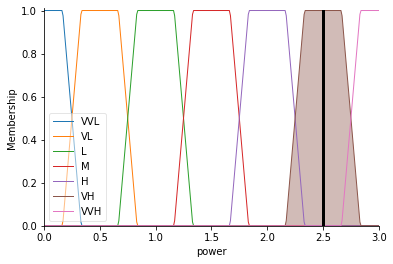

In [3]:
#A.
powering.input['temp'] = 35
powering.input['humidity'] = 100

powering.compute()

print(powering.output['power'])
power.view(sim=powering)


2.1142939838098047


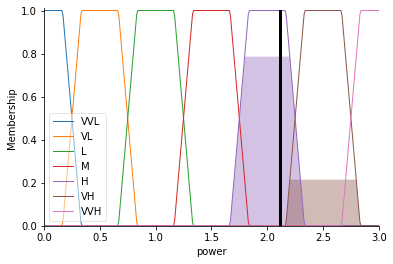

In [4]:
#B.
powering.input['temp'] = 45
powering.input['humidity'] = 75

powering.compute()

print(powering.output['power'])
power.view(sim=powering)

1.749490394470398


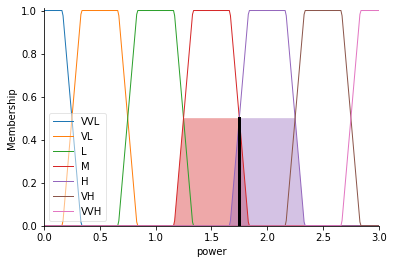

In [5]:
#C.

powering.input['temp'] = 50
powering.input['humidity'] = 50

powering.compute()

print(powering.output['power'])
power.view(sim=powering)